In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import datetime, timezone, date
from dateutil.relativedelta import relativedelta
from itertools import combinations

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import ccxt
import functions

import importlib
importlib.reload(functions)

sns.set_theme()


In [571]:
inst = ['AAVE','UNI','ETH','AVAX','ARB','DOT','OP','SOL']
pairs = [('AAVE','UNI'),('ETH','AVAX'),('ETH','UNI'),('ETH','ARB'),('ETH','DOT'),('ETH','OP'),('SOL','AVAX'),('AVAX','DOT')]

In [568]:
today = date.today()
one_year_later = today - relativedelta(years=2)

In [557]:
# Create a datetime object for 2023-06-15 at midnight UTC
dt = datetime(one_year_later.year, one_year_later.month, one_year_later.day, 0, 0, 0, tzinfo=timezone.utc)

# Convert to Unix timestamp in milliseconds
timestamp_ms = int(dt.timestamp() * 1000)

In [558]:
df = functions.close_df(inst,timestamp_ms)

In [559]:
signal_df = functions.spread_formation(df,pairs).dropna()

/var/folders/68/g1jncml17495jn3f_j8t3g1h0000gn/T/ipykernel_38832/3268670270.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


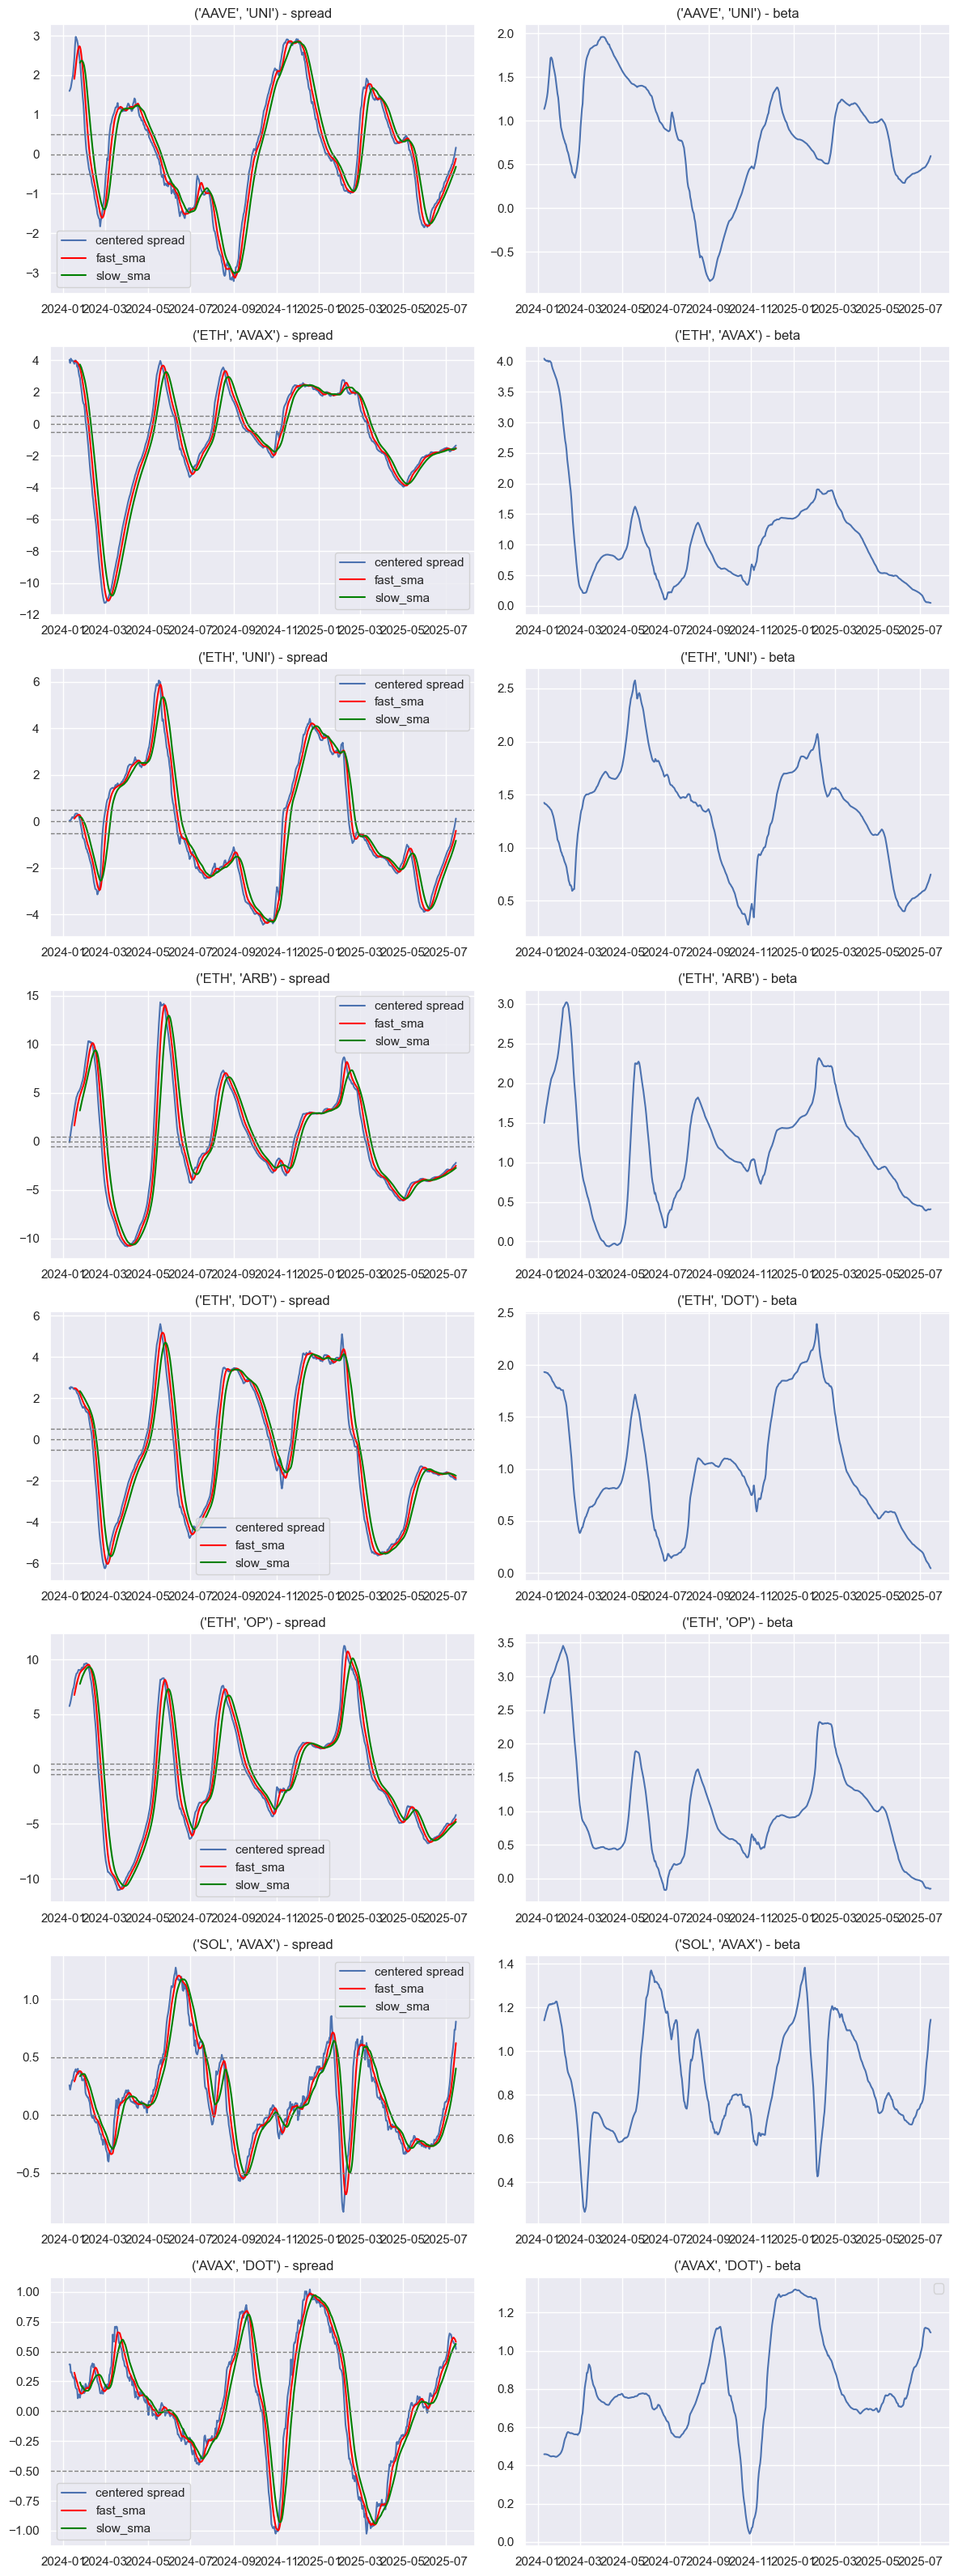

In [573]:
n_rows = len(pairs)
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

for k in range(len(pairs)):
    # axes[k, 0] and axes[k, 1] are the two columns for row k
    axes[k, 0].plot(signal_df[(pairs[k],'centered_spread')],label='centered spread')
    axes[k, 0].plot(signal_df[(pairs[k],'centered_spread')].rolling(8).mean(),label='fast_sma',color='red')
    axes[k, 0].plot(signal_df[(pairs[k],'centered_spread')].rolling(16).mean(),label='slow_sma',color='green')
    axes[k, 0].set_title(f'{pairs[k]} - spread')
    axes[k, 0].legend()  # add legend for this subplot
    axes[k, 0].axhline(y=0, color='grey', linestyle='--', linewidth=1)
    axes[k, 0].axhline(y=0.5, color='grey', linestyle='--', linewidth=1)
    axes[k, 0].axhline(y=-0.5, color='grey', linestyle='--', linewidth=1)  
    
    axes[k, 1].plot(signal_df[(pairs[k],'beta')])
    axes[k, 1].set_title(f'{pairs[k]} - beta')


plt.tight_layout()
plt.legend()
plt.show()

In [574]:
wts = functions.generate_weights(signal_df,inst, threshold=0.001)

3943
